# Lending Club Case Study Notebook

## Introduction
### Goal
Analyze the provided data and identify patterns/characteristics that will help to identify/predict bad loans.
### Context of Problem
The company is the largest **online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures**. Borrowers can easily access lower interest rate loans through a fast online interface. Like most other lending companies, lending loans to **‘risky’** applicants is the largest source of financial loss (called credit loss). **Credit loss** is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
### Target
Reduce the Credit Loss by using EDA techniques to find driving factors for the defaulting of loan.
### Risk associated with the problem
 - If the applicant is likely to repay the loan, then not approving loan is a loss of business (rejecting loans for non - default).
 - If the applicant is not likely to repay the loan, then approving loan may lead to financial loss (approving loans for default).
The given dataset contains information about past loans and each row represents the loan details of the applicants.

### Loading Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [30]:
loandata=pd.read_csv('loan.csv')

### Checking basic information about the data

In [31]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loandata.shape

(39717, 111)

In [6]:
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Checking for Null Values in the dataset

In [7]:
loandata.isnull().mean() * 100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

### Data Cleaning

In [32]:
#Removing columns with 100% null values
loandata.dropna(axis = 1, how = 'all', inplace = True)
loandata.isnull().mean() * 100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [33]:
#Removing columns with more than 60% missing data
loandata.drop(loandata.columns[loandata.isnull().mean()>0.6],axis=1,inplace=True)

In [12]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [34]:
#Removing columns which will not be useful for required analysis
loandata.drop(['emp_title','pymnt_plan','url','desc','zip_code','initial_list_status','collections_12_mths_ex_med',
               'policy_code','application_type','chargeoff_within_12_mths','tax_liens', 'title'],axis=1,inplace=True)
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [14]:
#Checking unique values
loandata.nunique().sum

<bound method Series.sum of id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
title                      19615
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
out_prncp                   1137
out_prncp_inv  

In [15]:
#Removing columns with only 1 unique value
loandata.drop(['acc_now_delinq', 'delinq_amnt'],axis=1,inplace=True)
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [35]:
loandata.term=loandata.term.apply(lambda x:x.replace(' months',''))
loandata.term=loandata.term.astype('int64')

In [36]:
loandata.int_rate=loandata.int_rate.apply(lambda x:x.replace('%',''))
loandata.int_rate=loandata.int_rate.astype('float')

In [23]:
loandata.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [24]:
loandata.emp_length.isnull().sum()

1075

In [37]:
loandata.emp_length=loandata.emp_length.fillna('10+ years')

In [38]:
loandata.emp_length=loandata.emp_length.apply(lambda x:x.replace(' years',''))
loandata.emp_length=loandata.emp_length.apply(lambda x:x.replace(' year',''))
loandata.emp_length=loandata.emp_length.apply(lambda x:x.replace('< ',''))
loandata.emp_length=loandata.emp_length.apply(lambda x:x.replace('+',''))
loandata.emp_length.value_counts()

emp_length
10    9954
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [39]:
loandata.emp_length=loandata.emp_length.astype('int64')

In [57]:
loandata.isnull().mean() * 100

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0

## Data Analysis

#### Univariate Analysis

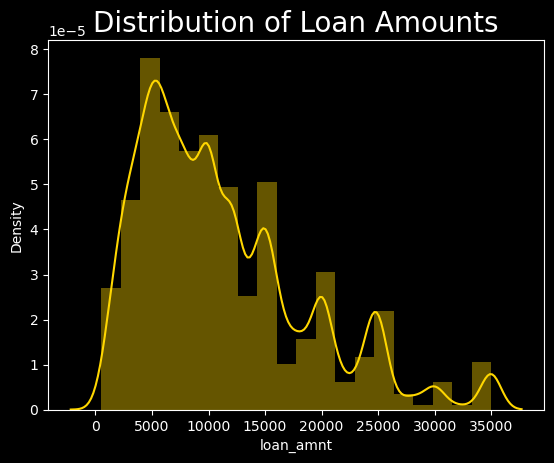

In [16]:
# Distribution of Loan Amount
plt.style.use('dark_background')
sns.distplot(loandata.loan_amnt,bins=20,color='gold')
plt.title("Distribution of Loan Amounts",fontsize=20)
plt.show()

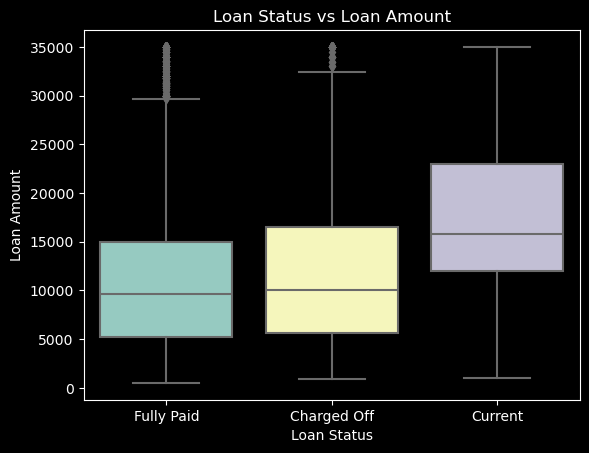

In [17]:
#Plotting Loan Amount vs Loan Status
sns.boxplot(x='loan_status', y='loan_amnt', data=loandata)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan Status vs Loan Amount')
plt.show()

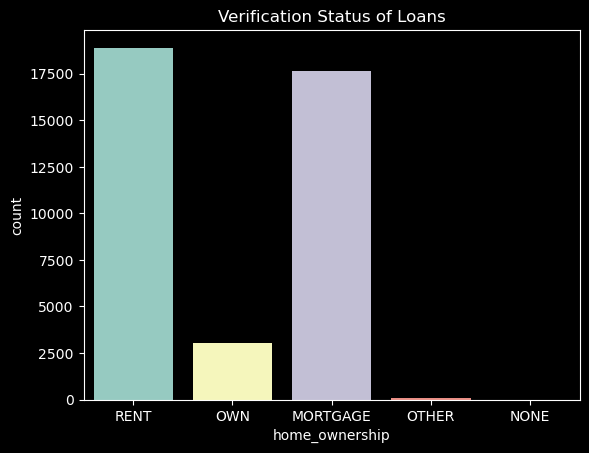

In [75]:
sns.countplot(loandata,x='home_ownership')
plt.title('Verification Status of Loans')
plt.show()

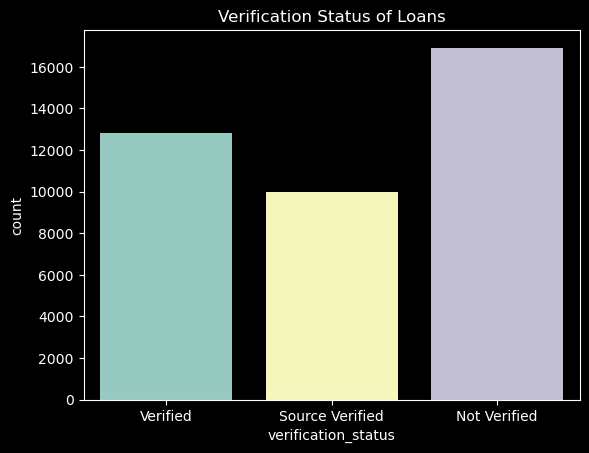

In [66]:
sns.countplot(loandata,x='verification_status')
plt.title('Verification Status of Loans')
plt.show()

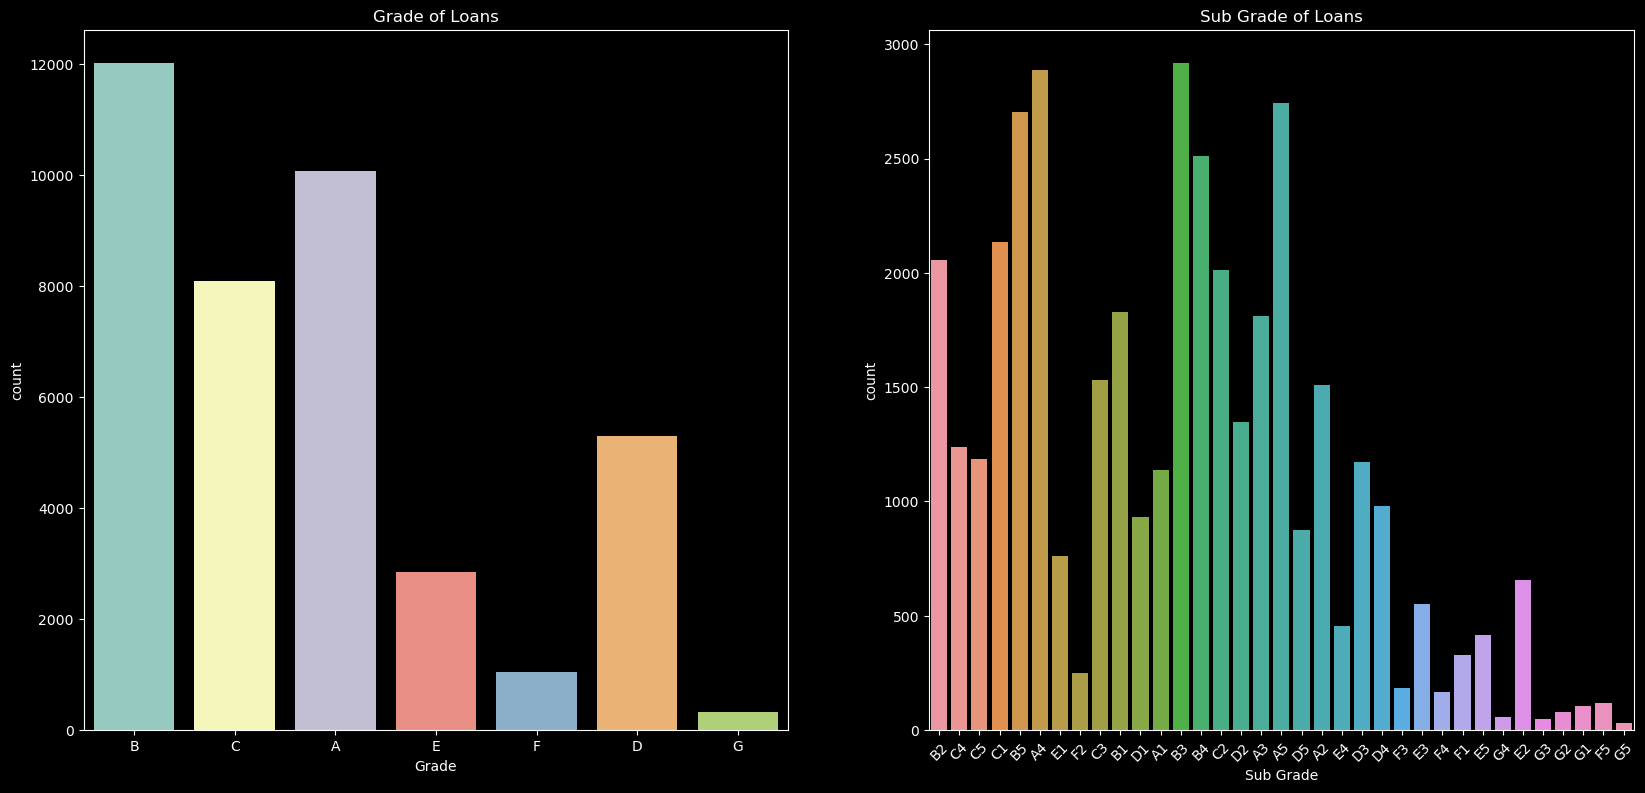

In [65]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.countplot(loandata,x='grade')
plt.xlabel('Grade')
plt.title('Grade of Loans')
plt.subplot(222)
sns.countplot(loandata,x='sub_grade')
plt.xlabel('Sub Grade')
plt.xticks(rotation = 45)
plt.title('Sub Grade of Loans')
plt.show()

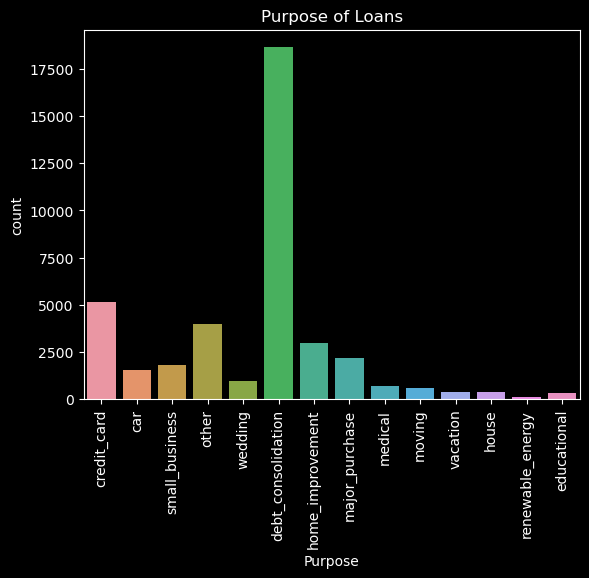

In [64]:
sns.countplot(loandata,x='purpose')
plt.xticks(rotation = 90)
plt.xlabel('Purpose')
plt.title('Purpose of Loans')
plt.show()

## Segmented Univariate Analysis

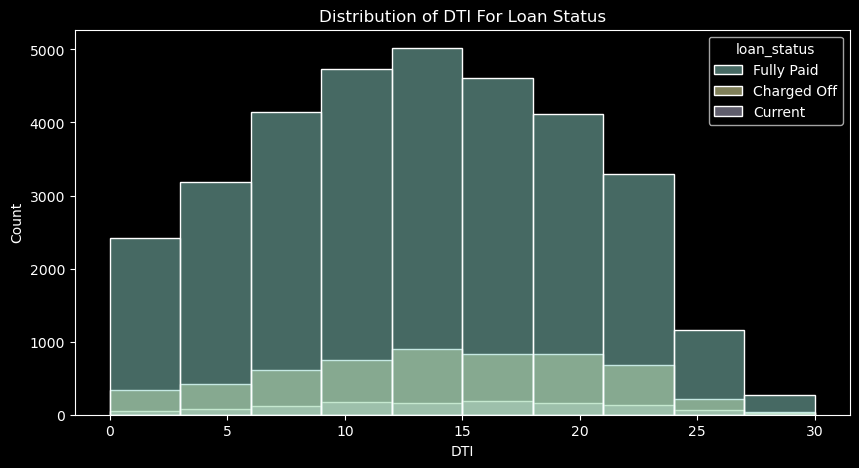

In [72]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loandata,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

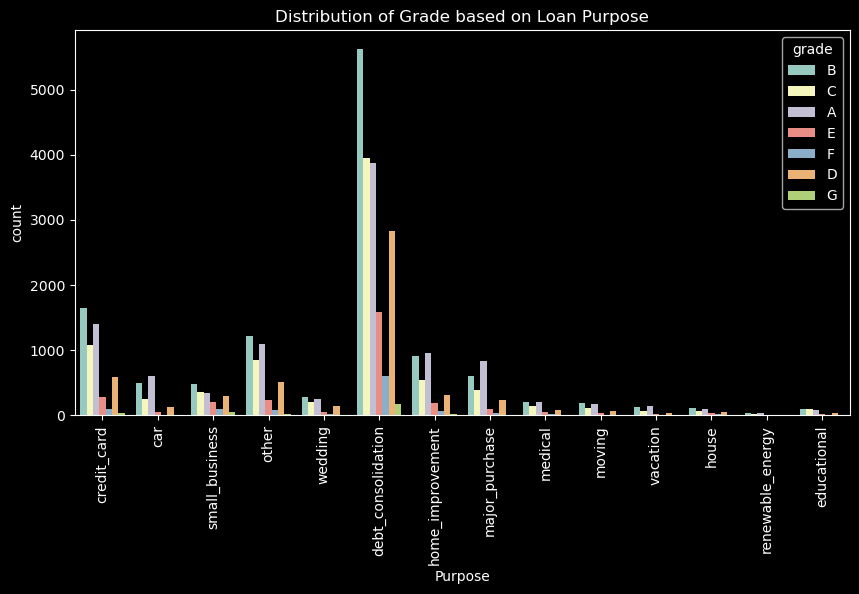

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(loandata,x='purpose',hue="grade")
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.title('Distribution of Grade based on Loan Purpose')
plt.show()

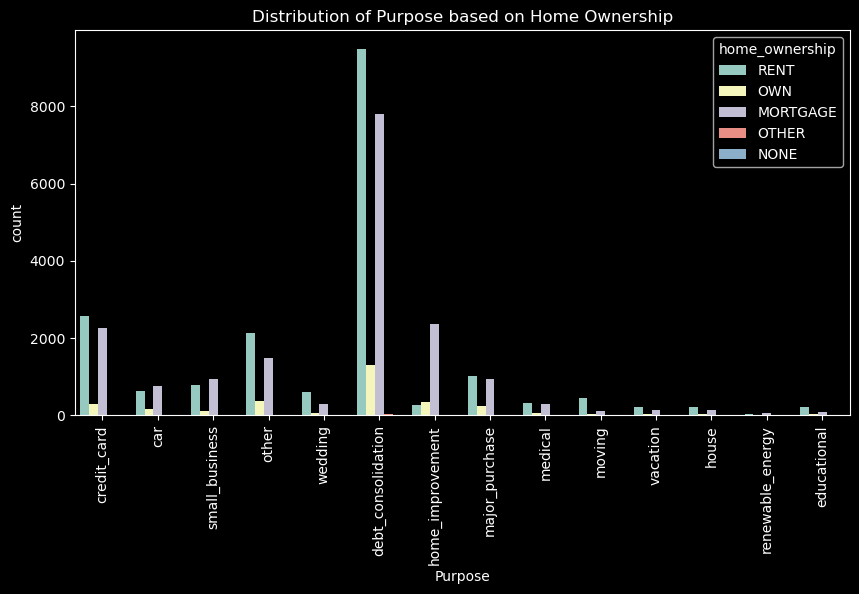

In [78]:
plt.figure(figsize=(10,5))
sns.countplot(loandata,x='purpose',hue="home_ownership")
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.title('Distribution of Purpose based on Home Ownership')
plt.show()

#### Data Slicing for focus on Bad Loans

In [47]:
#Slicing the data based on Loan Status. Focus will only be on 'Charged Off' Category
loandata_chrgdoff=loandata[loandata['loan_status']=='Charged Off']
loandata_chrgdoff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5627 entries, 1 to 39688
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5627 non-null   int64  
 1   member_id                5627 non-null   int64  
 2   loan_amnt                5627 non-null   int64  
 3   funded_amnt              5627 non-null   int64  
 4   funded_amnt_inv          5627 non-null   float64
 5   term                     5627 non-null   int64  
 6   int_rate                 5627 non-null   float64
 7   installment              5627 non-null   float64
 8   grade                    5627 non-null   object 
 9   sub_grade                5627 non-null   object 
 10  emp_length               5627 non-null   int64  
 11  home_ownership           5627 non-null   object 
 12  annual_inc               5627 non-null   float64
 13  verification_status      5627 non-null   object 
 14  issue_d                  562

In [48]:
#Removing columns not useful for analysis of Charged Off Loans
loandata_chrgdoff.drop(['member_id','issue_d','addr_state','earliest_cr_line','inq_last_6mths','open_acc',
                        'pub_rec','revol_bal','revol_util','total_acc','out_prncp','last_pymnt_amnt','last_credit_pull_d',
                        'out_prncp_inv','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
                        'pub_rec_bankruptcies', 'funded_amnt'],axis=1,inplace=True)

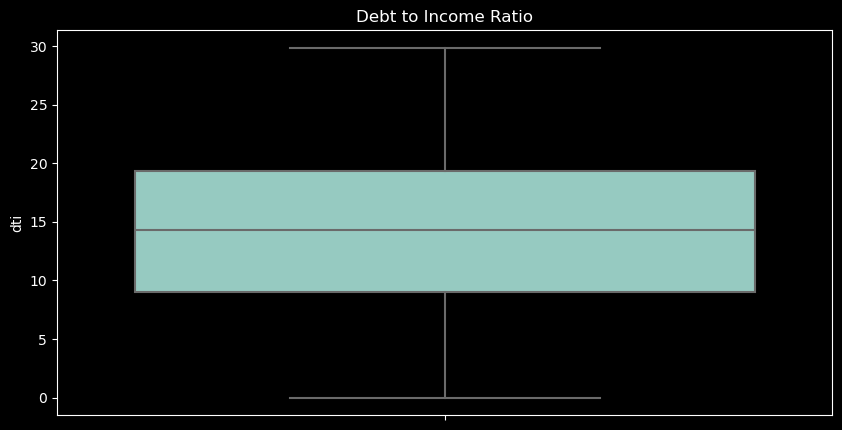

In [81]:
plt.figure(figsize=(10,5))
sns.boxplot(y=loandata_chrgdoff['dti'])
plt.title("Debt to Income Ratio")
plt.show()

In [82]:
##Prepare DTI_RiskLevel buckets for the DTI column using pd.qcut
loandata_chrgdoff['DTI_RiskLevel']=pd.qcut(loandata_chrgdoff.dti,[0,0.2,0.4,0.6,0.8,1],['LowRisk','HighRisk','VeryHighRisk','MediumRisk','VeryLowRisk'])
loandata_chrgdoff.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,dti,delinq_2yrs,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,acc_now_delinq,delinq_amnt,DTI_RiskLevel
1,1077430,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,...,car,1.00,0,1008.71,1008.71,456.46,435.17,0,0,LowRisk
8,1071795,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,...,small_business,5.55,0,646.02,646.02,162.02,294.94,0,0,LowRisk
9,1071570,5375,5350.0,60,12.69,121.45,B,B5,1,RENT,...,other,18.08,0,1476.19,1469.34,673.48,533.42,0,0,MediumRisk
12,1064687,9000,9000.0,36,13.49,305.38,C,C1,1,RENT,...,debt_consolidation,10.08,0,2270.70,2270.70,1256.14,570.26,0,0,HighRisk
14,1069057,10000,10000.0,36,10.65,325.74,B,B2,3,RENT,...,other,7.06,0,7471.99,7471.99,5433.47,1393.42,0,0,LowRisk


### Bivariate Analysis

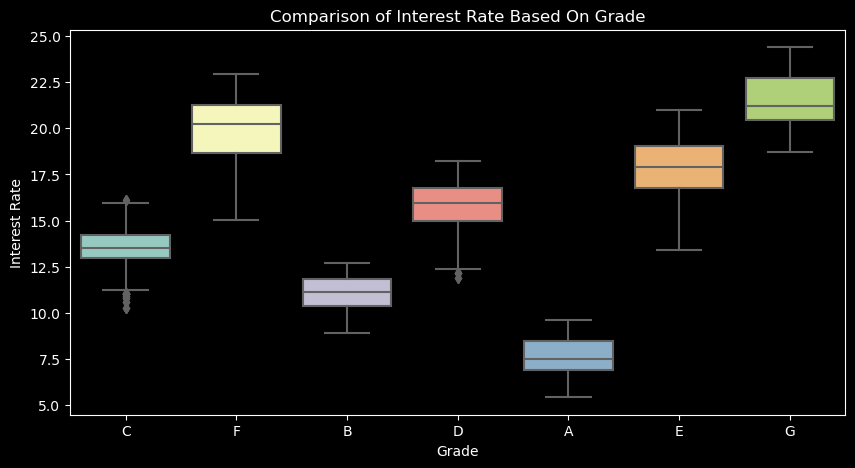

In [96]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loandata_chrgdoff,x='grade',y='int_rate')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

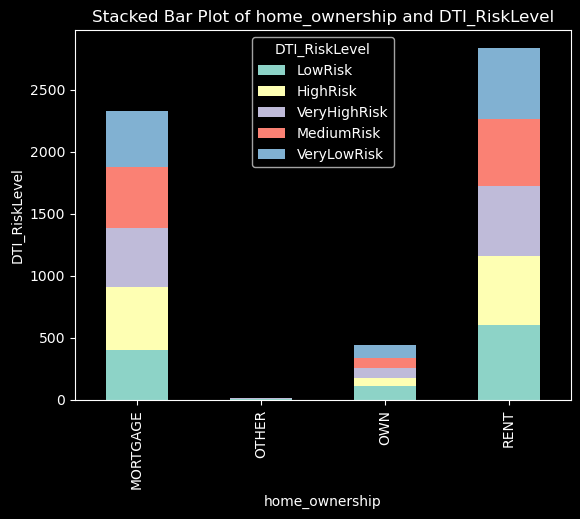

In [83]:
#home_ownership Vs DTI_RiskLevel
crosstab = pd.crosstab(loandata_chrgdoff['home_ownership'],loandata_chrgdoff['DTI_RiskLevel'])

# Plot the stacked bar plot
crosstab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of home_ownership and DTI_RiskLevel')
plt.xlabel('home_ownership')
plt.ylabel('DTI_RiskLevel')
plt.show()

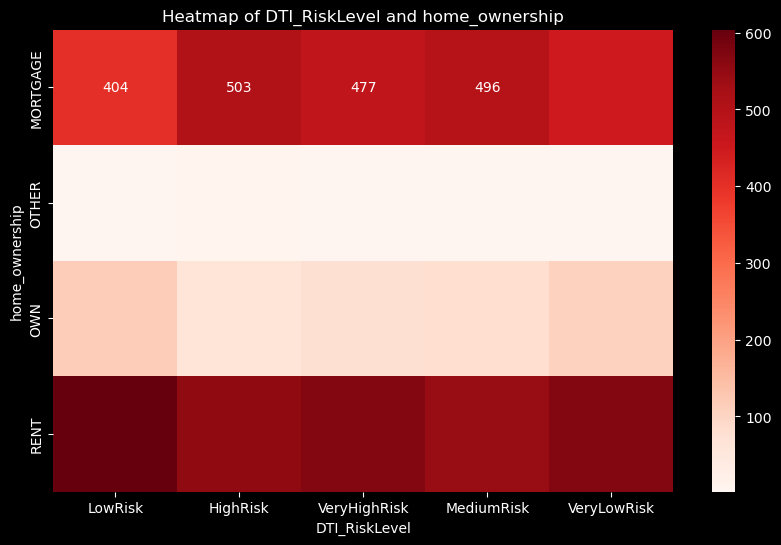

In [84]:
#home_ownership Vs DTI_RiskLevel
crosstab = pd.crosstab(loandata_chrgdoff['home_ownership'],loandata_chrgdoff['DTI_RiskLevel'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
#sns.heatmap(crosstab, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True)) #cmap=Blues,crest,
#plasma,viridis,coolwarm,cividis,Reds
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of DTI_RiskLevel and home_ownership')
plt.xlabel('DTI_RiskLevel')
plt.ylabel('home_ownership')
plt.show()

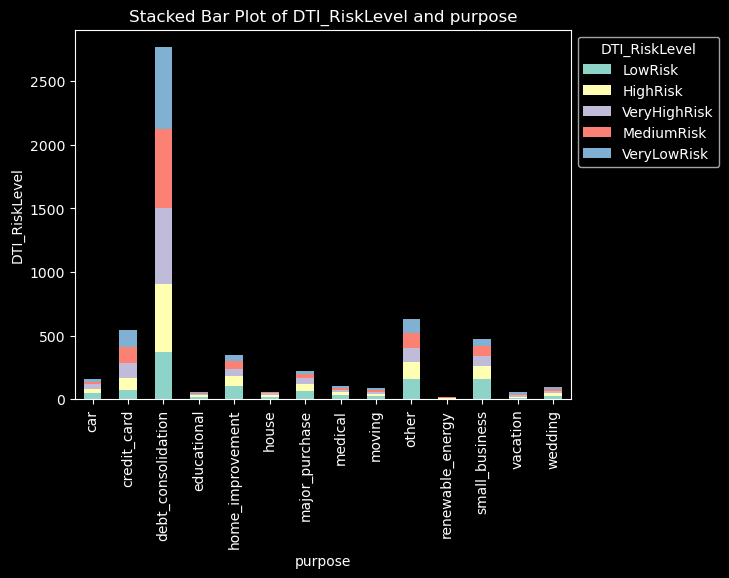

In [87]:
#purpose Vs DTI_RiskLevel
crosstab = pd.crosstab(loandata_chrgdoff['purpose'],loandata_chrgdoff['DTI_RiskLevel'])

# Plot the stacked bar plot
crosstab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of DTI_RiskLevel and purpose')
plt.xlabel('purpose')
plt.ylabel('DTI_RiskLevel')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='DTI_RiskLevel')
plt.show()

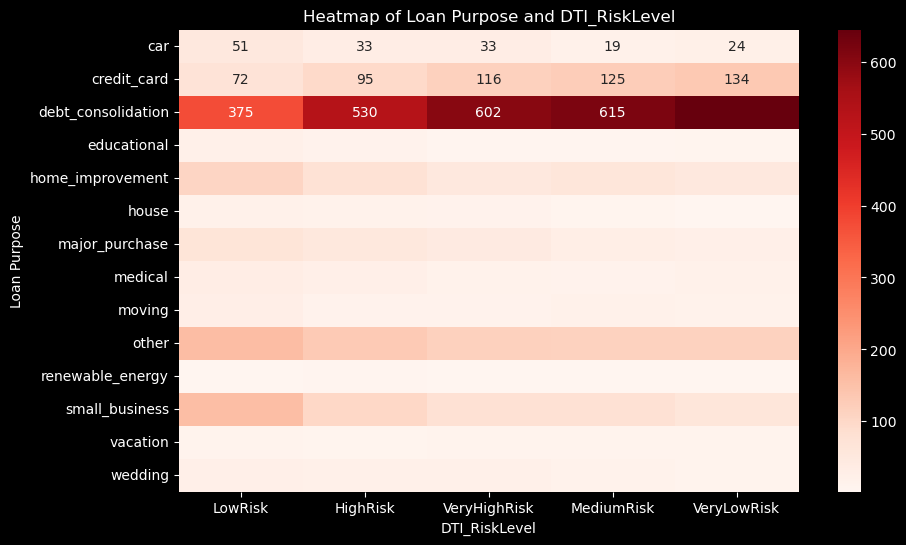

In [88]:
#purpose Vs DTI_RiskLevel
crosstab = pd.crosstab(loandata_chrgdoff['purpose'],loandata_chrgdoff['DTI_RiskLevel'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
#sns.heatmap(crosstab, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True)) #cmap=Blues,crest,
#plasma,viridis,coolwarm,cividis,Reds
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of Loan Purpose and DTI_RiskLevel')
plt.xlabel('DTI_RiskLevel')
plt.ylabel('Loan Purpose')
plt.show()

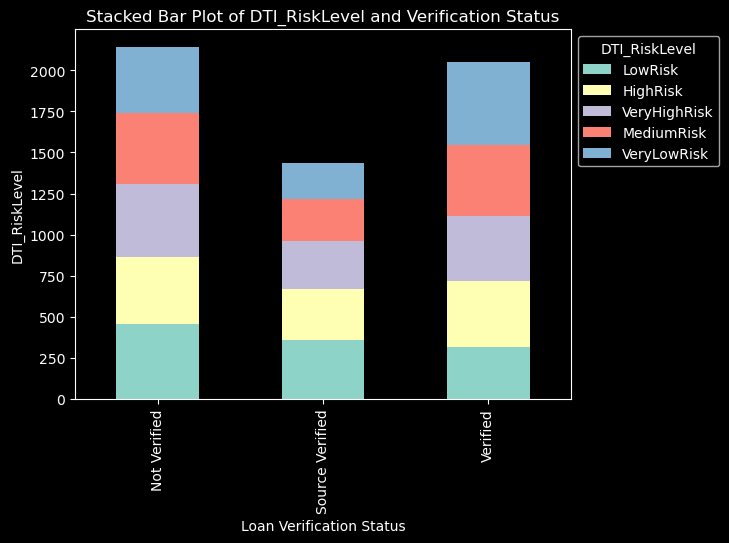

In [90]:
#verification_status Vs DTI_RiskLevel
crosstab = pd.crosstab(loandata_chrgdoff['verification_status'],loandata_chrgdoff['DTI_RiskLevel'])

# Plot the stacked bar plot
crosstab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of DTI_RiskLevel and Verification Status')
plt.xlabel('Loan Verification Status')
plt.ylabel('DTI_RiskLevel')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='DTI_RiskLevel')
plt.show()

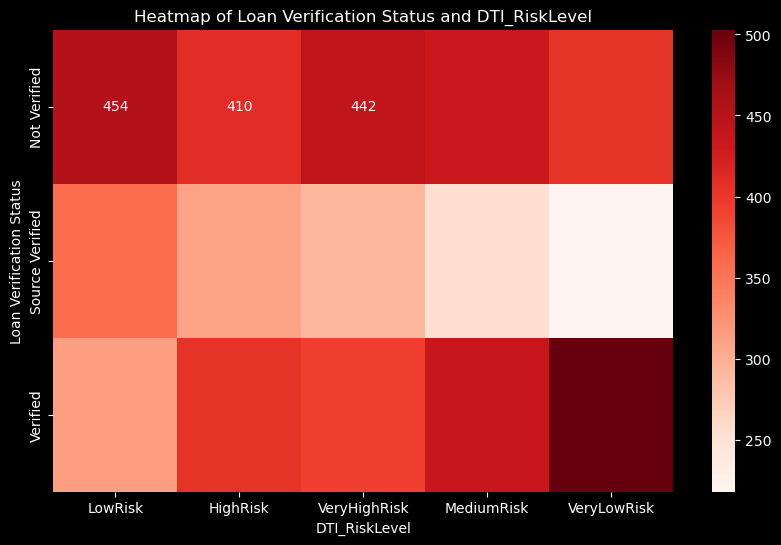

In [91]:
#verification_status Vs DTI_RiskLevel
crosstab = pd.crosstab(loandata_chrgdoff['verification_status'],loandata_chrgdoff['DTI_RiskLevel'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
#sns.heatmap(crosstab, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True)) #cmap=Blues,crest,
#plasma,viridis,coolwarm,cividis,Reds
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of Loan Verification Status and DTI_RiskLevel')
plt.xlabel('DTI_RiskLevel')
plt.ylabel('Loan Verification Status')
plt.show()

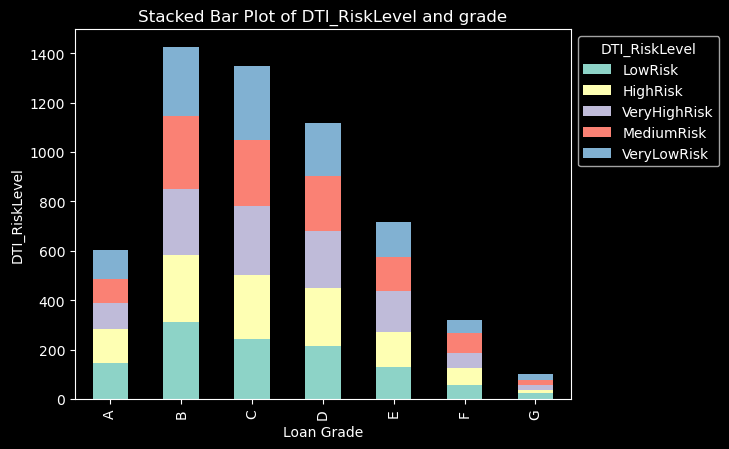

In [93]:
#grade Vs DTI_RiskLevel
crosstab = pd.crosstab(loandata_chrgdoff['grade'],loandata_chrgdoff['DTI_RiskLevel'])

# Plot the stacked bar plot
crosstab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of DTI_RiskLevel and grade')
plt.xlabel('Loan Grade')
plt.ylabel('DTI_RiskLevel')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='DTI_RiskLevel')
plt.show()

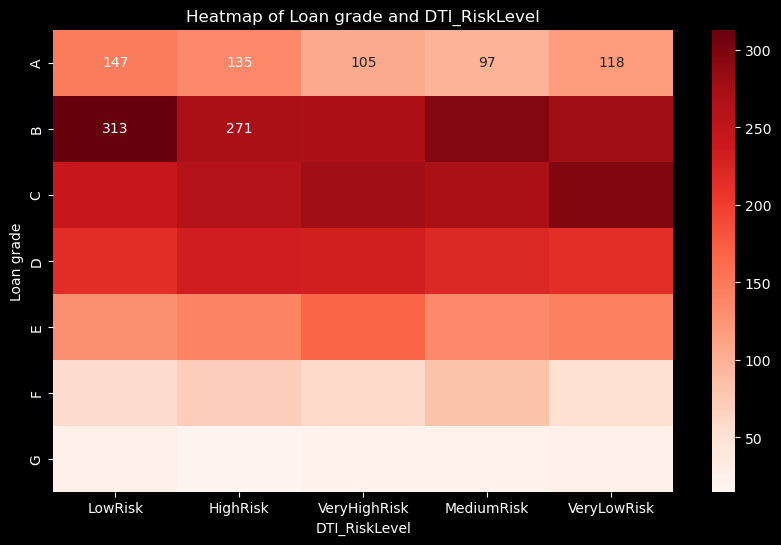

In [92]:
#grade Vs DTI_RiskLevel
crosstab = pd.crosstab(loandata_chrgdoff['grade'],loandata_chrgdoff['DTI_RiskLevel'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
#sns.heatmap(crosstab, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True)) #cmap=Blues,crest,
#plasma,viridis,coolwarm,cividis,Reds
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of Loan grade and DTI_RiskLevel')
plt.xlabel('DTI_RiskLevel')
plt.ylabel('Loan grade')
plt.show()

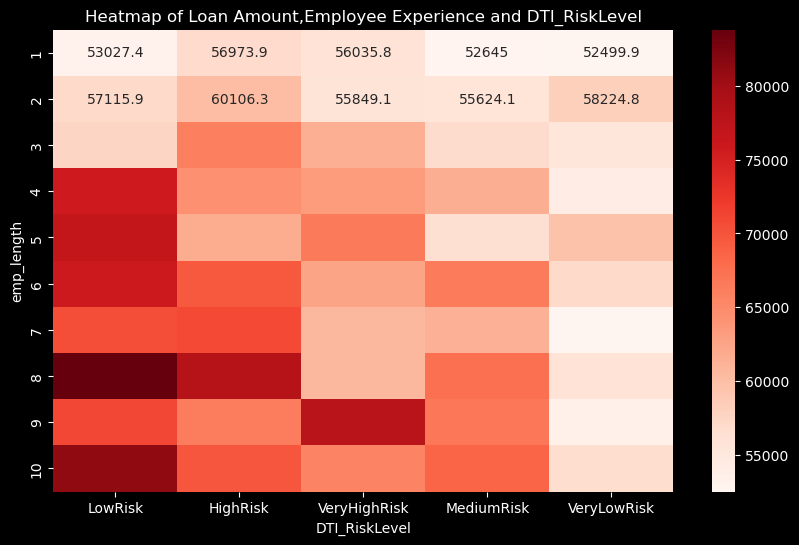

In [94]:
# Plot the heatmap
result=pd.pivot_table(data=loandata_chrgdoff,index='emp_length', columns='DTI_RiskLevel',values='annual_inc')
plt.figure(figsize=(10, 6))
#sns.heatmap(crosstab, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True)) #cmap=Blues,crest,
#plasma,viridis,coolwarm,cividis,Reds
sns.heatmap(result, annot=True,cmap='Reds', fmt='g')
plt.title('Heatmap of Loan Amount,Employee Experience and DTI_RiskLevel')
#plt.xlabel('DTI_RiskLevel')
#plt.ylabel('Loan Amount')
plt.show()

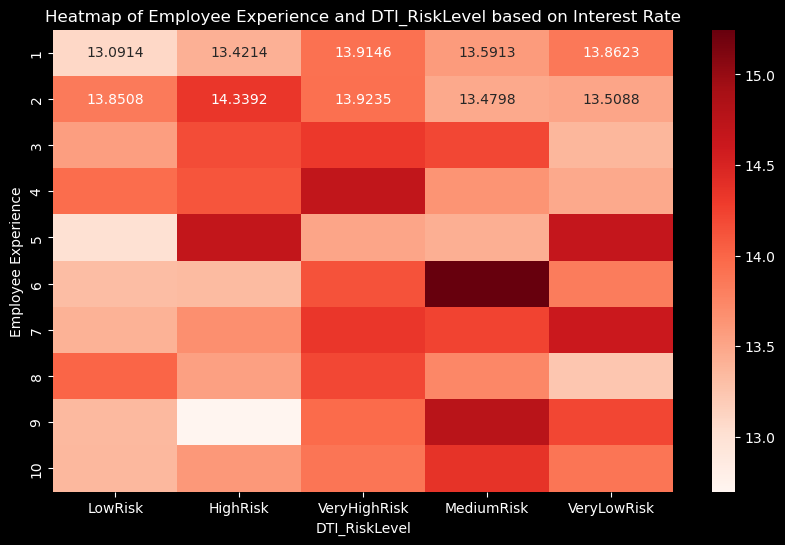

In [95]:
#Plot the heatmap
result=pd.pivot_table(data=loandata_chrgdoff,index='emp_length', columns='DTI_RiskLevel',values='int_rate')
plt.figure(figsize=(10, 6))
#sns.heatmap(crosstab, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True)) #cmap=Blues,crest,
#plasma,viridis,coolwarm,cividis,Reds
sns.heatmap(result, annot=True,cmap='Reds', fmt='g')
plt.title('Heatmap of Employee Experience and DTI_RiskLevel based on Interest Rate')
plt.xlabel('DTI_RiskLevel')
plt.ylabel('Employee Experience')
plt.show()